In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
pd.set_option('display.max_columns', None)


In [2]:
df = pd.read_csv('../input/diabetes-data-set/diabetes.csv')

In [3]:
df.tail(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [4]:
df.shape

(768, 9)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

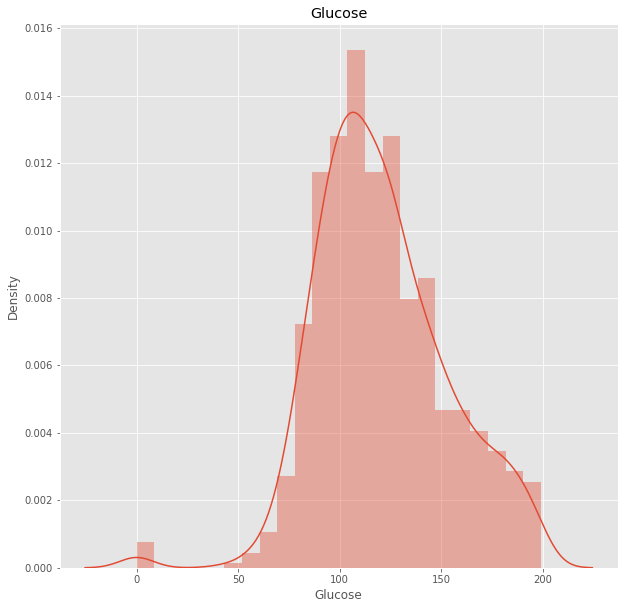

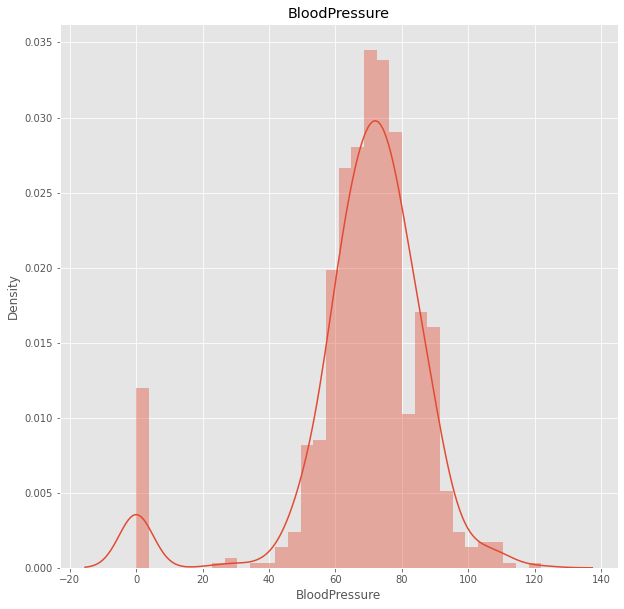

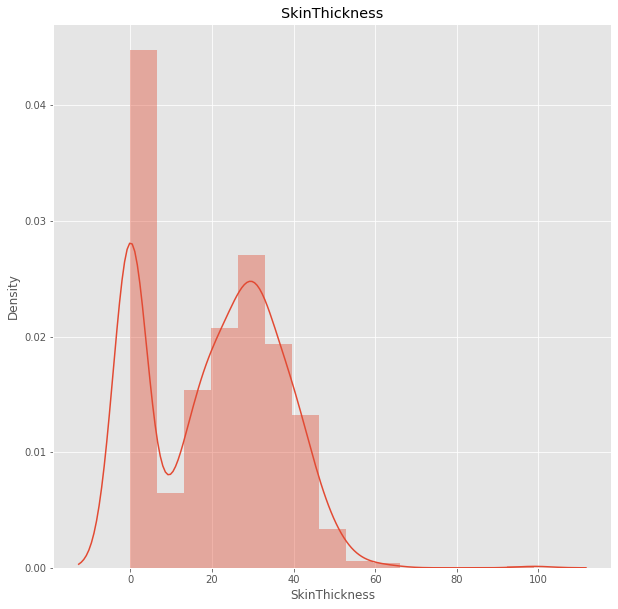

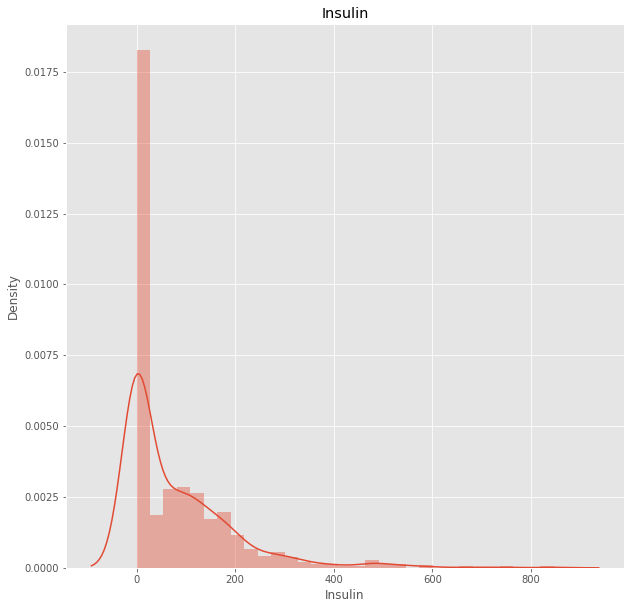

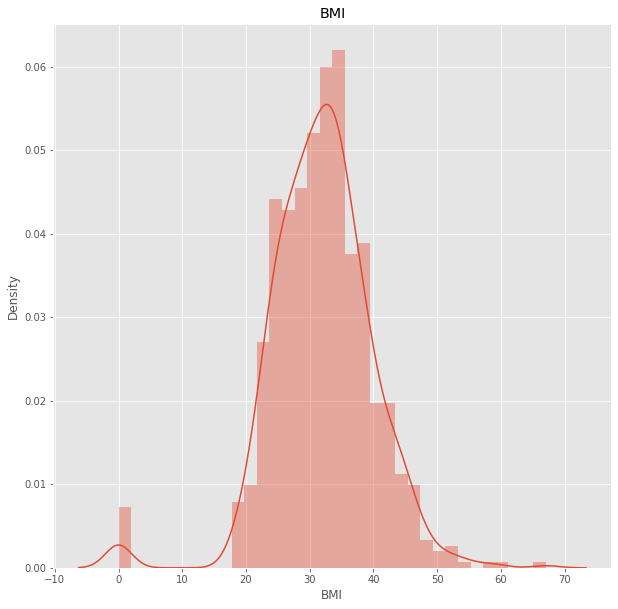

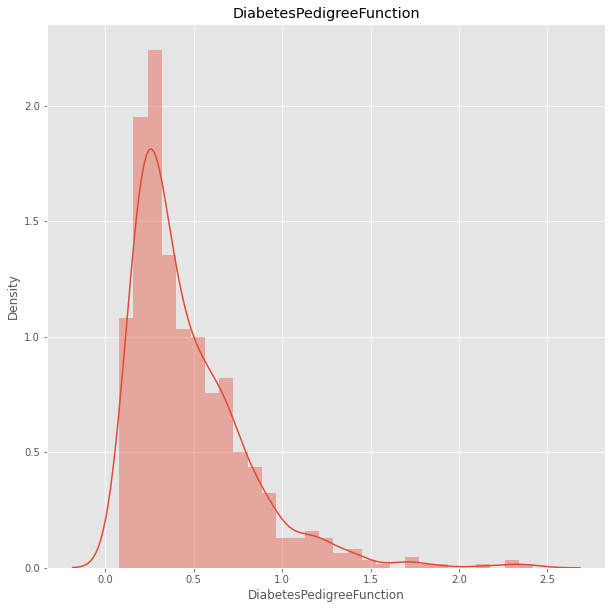

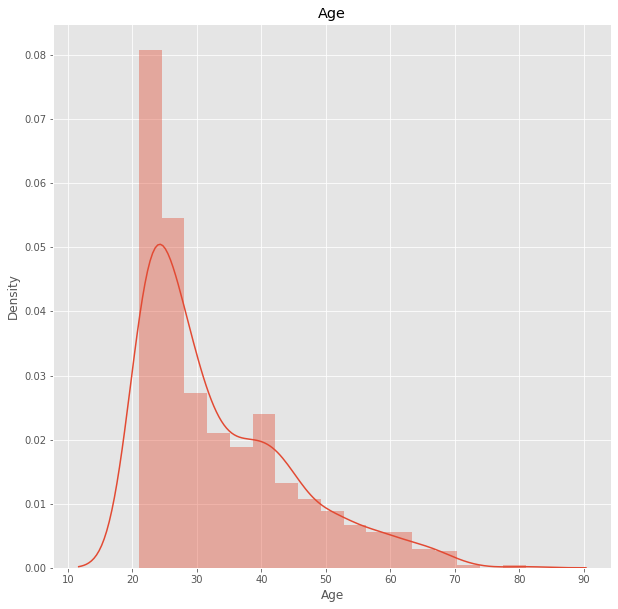

In [7]:
## distribution plot of features
import matplotlib.pyplot as plt
import seaborn as sns

for f in ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']:
    plt.style.use('ggplot')
    plt.figure(figsize = (10,10))
    sns.distplot(df[f])
    plt.title(f)

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


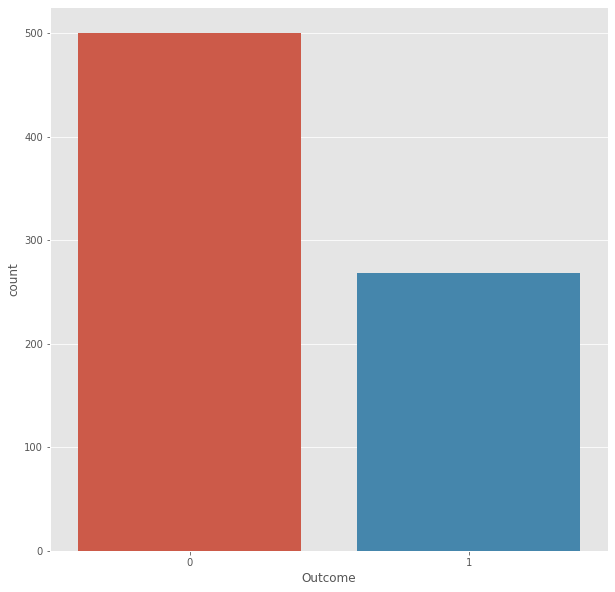

In [8]:
plt.figure(figsize = (10,10))
sns.countplot(df['Outcome'])
plt.show()

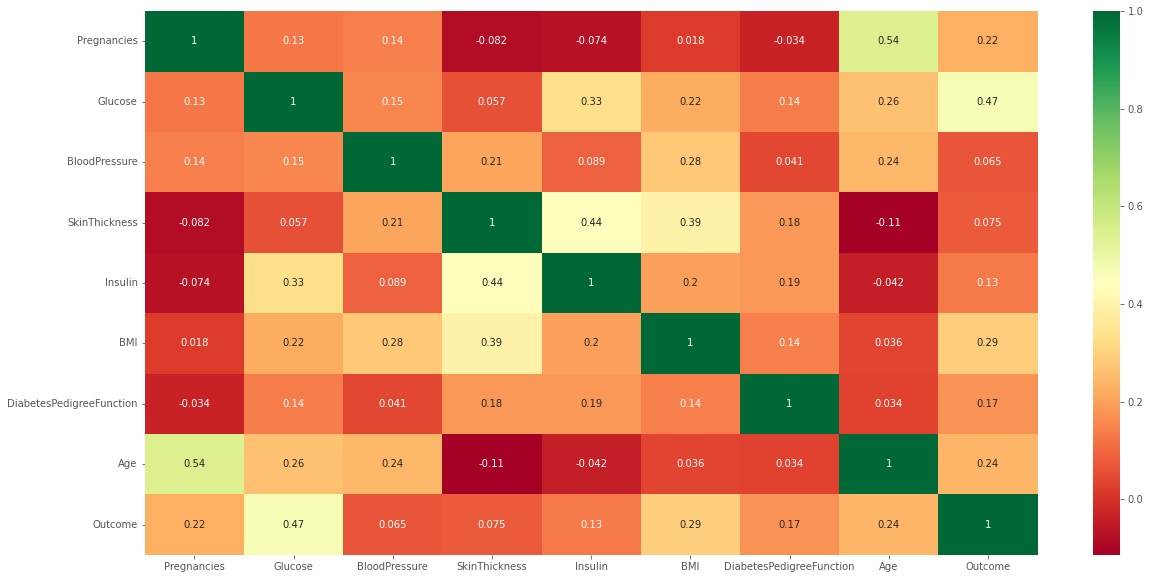

In [9]:
plt.figure(figsize = (20,10))
sns.heatmap(df.corr(), annot = True, cmap = 'RdYlGn')
plt.show()

In [10]:
## now we'll convert glucose and insulin features into one hot encoding

df['Glucose'] = np.where(df.Glucose == 0, df.Glucose.median(), df['Glucose'])
df['Insulin'] = np.where(df.Insulin == 0, df.Insulin.median(), df['Insulin'])

In [11]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72,35,30.5,33.6,0.627,50,1
1,1,85.0,66,29,30.5,26.6,0.351,31,0
2,8,183.0,64,0,30.5,23.3,0.672,32,1
3,1,89.0,66,23,94.0,28.1,0.167,21,0
4,0,137.0,40,35,168.0,43.1,2.288,33,1


In [12]:
## Dependent and Independent features

X = df.iloc[:, :-1]
y = df.iloc[:,-1]

In [13]:
print(X.head())
print(y.head())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6    148.0             72             35     30.5  33.6   
1            1     85.0             66             29     30.5  26.6   
2            8    183.0             64              0     30.5  23.3   
3            1     89.0             66             23     94.0  28.1   
4            0    137.0             40             35    168.0  43.1   

   DiabetesPedigreeFunction  Age  
0                     0.627   50  
1                     0.351   31  
2                     0.672   32  
3                     0.167   21  
4                     2.288   33  
0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64


In [14]:
## train test split

from sklearn.model_selection import train_test_split

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [16]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(576, 8)
(192, 8)
(576,)
(192,)


In [17]:
y.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [18]:
## Now applying Random Forest Classifier

from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators = 10)
rfc.fit(X_train, y_train)


RandomForestClassifier(n_estimators=10)

In [19]:
preds = rfc.predict(X_test)

In [20]:
## Evaluation metrics

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print('Confusion Matrix result is: \n {}'.format(confusion_matrix(y_test, preds)))
print('Classification Report result is: \n{}'.format(classification_report(y_test, preds)))
print('Accuracy Score result is: \n{}'.format(accuracy_score(y_test, preds)))

Confusion Matrix result is: 
 [[98 25]
 [32 37]]
Classification Report result is: 
              precision    recall  f1-score   support

           0       0.75      0.80      0.77       123
           1       0.60      0.54      0.56        69

    accuracy                           0.70       192
   macro avg       0.68      0.67      0.67       192
weighted avg       0.70      0.70      0.70       192

Accuracy Score result is: 
0.703125


#### The main parameters used by a Random Forest is 
##### 1. Criterion = the fuction used to evaluate the quality of a split
##### 2. max_depth = maximum number of levels allowed in each tree
##### 3. max_features = maximum number of features considered when splitting a node
##### 4. min_samples_leaf = minimum number of samples which can be stored in a tree leaf
##### 5. min_samples_split = minimum number of samples necessary in a node to cause node splitting
##### 6. n_estimators = number of trees in the ensemble


In [21]:
## we'll be using RandomizedSearchCV for hyperparameter tuning

from sklearn.model_selection import RandomizedSearchCV

n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10 )]
max_features = ['auto', 'sqrt', 'log2']
max_depth = [int(x) for x in np.linspace(10,1000,10)]
min_samples_leaf = [1,2,4,6,8,10]
min_samples_split = [1,2,3,4,5,6,7,8,9,10,11]

random_grid = {
    'n_estimators': n_estimators,
    'max_features': max_features,
    'max_depth': max_depth,
    'min_samples_leaf': min_samples_leaf,
    'min_samples_split': min_samples_split,
    'criterion': ['entropy', 'gini']
}

print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [10, 120, 230, 340, 450, 560, 670, 780, 890, 1000], 'min_samples_leaf': [1, 2, 4, 6, 8, 10], 'min_samples_split': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11], 'criterion': ['entropy', 'gini']}


In [22]:
rfc = RandomForestClassifier()

rfc_randomcv = RandomizedSearchCV(estimator = rfc, param_distributions = random_grid, n_iter = 100, cv = 3, verbose = 2,
                                 random_state = 100, n_jobs = 1)

In [23]:
rfc_randomcv.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV] END criterion=gini, max_depth=1000, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1800; total time=   3.7s
[CV] END criterion=gini, max_depth=1000, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1800; total time=   3.7s
[CV] END criterion=gini, max_depth=1000, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1800; total time=   3.6s
[CV] END criterion=entropy, max_depth=780, max_features=auto, min_samples_leaf=4, min_samples_split=7, n_estimators=1600; total time=   3.3s
[CV] END criterion=entropy, max_depth=780, max_features=auto, min_samples_leaf=4, min_samples_split=7, n_estimators=1600; total time=   3.2s
[CV] END criterion=entropy, max_depth=780, max_features=auto, min_samples_leaf=4, min_samples_split=7, n_estimators=1600; total time=   3.3s
[CV] END criterion=entropy, max_depth=670, max_features=auto, min_samples_leaf=4, min_samples_spl

/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
18 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
18 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 681, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py", line 459, in fit
    for i, t in enumerate(trees)
  File "/opt/conda/lib/python3.7/site-packages/joblib/parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "/opt/conda/lib/python3.7/site-packages/joblib/par

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=1,
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': [10, 120, 230, 340, 450,
                                                      560, 670, 780, 890,
                                                      1000],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4, 6, 8, 10],
                                        'min_samples_split': [1, 2, 3, 4, 5, 6,
                                                              7, 8, 9, 10, 11],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
  

In [24]:
rfc_randomcv.best_params_

{'n_estimators': 1800,
 'min_samples_split': 8,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 780,
 'criterion': 'entropy'}

In [25]:
randomcv_best_params = rfc_randomcv.best_estimator_

In [26]:
prediction = randomcv_best_params.predict(X_test)

In [27]:
print('Confusion Matrix result is: \n {}'.format(confusion_matrix(y_test, prediction)))
print('Classification Report result is: \n{}'.format(classification_report(y_test, prediction)))
print('Accuracy Score result is: \n{}'.format(accuracy_score(y_test, prediction)))

Confusion Matrix result is: 
 [[99 24]
 [24 45]]
Classification Report result is: 
              precision    recall  f1-score   support

           0       0.80      0.80      0.80       123
           1       0.65      0.65      0.65        69

    accuracy                           0.75       192
   macro avg       0.73      0.73      0.73       192
weighted avg       0.75      0.75      0.75       192

Accuracy Score result is: 
0.75
